In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


sitka us
ribeira grande pt
coquimbo cl
cape town za
ushuaia ar
victoria sc
zhangye cn
lata sb
faanui pf
tuktoyaktuk ca
barhiya in
ushuaia ar
obo cf
mataura pf
codrington ag
canto do buriti br
norman wells ca
puerto ayora ec
kapaa us
saleaula ws
kimbe pg
kapaa us
arraial do cabo br
ikast dk
deputatskiy ru
nikolskoye ru
mataura pf
yaan cn
iqaluit ca
butaritari ki
rikitea pf
ribeira grande pt
rudbar af
praia da vitoria pt
hermanus za
lively ca
rikitea pf
kapaa us
maxixe mz
tuktoyaktuk ca
chuy uy
chokurdakh ru
new norfolk au
cantapoy ph
nenjiang cn
grand river south east mu
oranjestad an
tsihombe mg
erenhot cn
taolanaro mg
kavieng pg
hobart au
puerto ayora ec
ushuaia ar
jamestown sh
pijijiapan mx
hobart au
rikitea pf
samusu ws
georgetown sh
saleaula ws
ramsar ir
jamestown sh
busselton au
tatarskaya pishlya ru
diveyevo ru
faya td
umzimvubu za
meyungs pw
longyearbyen sj
ushuaia ar
taolanaro mg
tuktoyaktuk ca
kodiak us
rikitea pf
hobart au
fort morgan us
punta arenas cl
port lincoln au
vestma

darhan mn
victoria sc
mount gambier au
ushuaia ar
hobart au
ostrovnoy ru
mareeba au
ushuaia ar
bali in
bodden town ky
hermanus za
mataura pf
upernavik gl
anadyr ru
tahe cn
husavik is
rikitea pf
lemesos cy
ushuaia ar
georgetown sh
tuatapere nz
lazaro cardenas mx
vila franca do campo pt
torbay ca
dzhusaly kz
punta arenas cl
nanortalik gl
yellowknife ca
busselton au
khatanga ru
vaini to
flinders au
aykhal ru
ostrovnoy ru
attawapiskat ca
barra do garcas br
puerto ayora ec
jamestown sh
hilo us
ushuaia ar
bredasdorp za
manitouwadge ca
tyret pervaya ru
along in
baracoa cu
fortuna us
bow island ca
buariki ki
campbell river ca
qaanaaq gl
macau br
teshie gh
port alfred za
saint george bm
formoso do araguaia br
taolanaro mg
belushya guba ru
nikolskoye ru
ponta do sol pt
altay cn
jamestown sh
mataura pf
vaini to
te anau nz
los andes cl
acapulco mx
taolanaro mg
nogales mx
xining cn
puerto ayora ec
ponta do sol cv
yellowknife ca
puerto ayora ec
nanchang cn
college us
curumani co
le port re
riyadh sa

hobart au
lompoc us
busselton au
mangaratiba br
khatanga ru
ushuaia ar
mys shmidta ru
faanui pf
lucapa ao
yuzhno-kurilsk ru
vaini to
hofn is
nizhneyansk ru
nanortalik gl
vila franca do campo pt
laguna br
majene id
corralillo cu
illoqqortoormiut gl
east london za


617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9c4a366a7fe83b9a912375f1a604eca


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9c4a366a7fe83b9a912375f1a604eca&q=Boston


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | sitka
Processing Record 2 of Set 13 | ribeira grande
Processing Record 3 of Set 13 | coquimbo
Processing Record 4 of Set 13 | cape town
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | victoria
Processing Record 7 of Set 13 | zhangye
Processing Record 8 of Set 13 | lata
Processing Record 9 of Set 13 | faanui
Processing Record 10 of Set 13 | tuktoyaktuk
Processing Record 11 of Set 13 | barhiya
Processing Record 12 of Set 13 | obo
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 13 | codrington
Processing Record 15 of Set 13 | canto do buriti
Processing Record 16 of Set 13 | norman wells
Processing Record 17 of Set 13 | puerto ayora
Processing Record 18 of Set 13 | kapaa
Processing Record 19 of Set 13 | saleaula
City not found. Skipping...
Processing Record 20 of Set 13 | kimbe
Processing Record 21 of Set 13 | arraial do cabo
Processing Record 22 of Set 1

Processing Record 35 of Set 16 | dubenskiy
City not found. Skipping...
Processing Record 36 of Set 16 | santa cruz del sur
Processing Record 37 of Set 16 | periyanayakkanpalaiyam
Processing Record 38 of Set 16 | hithadhoo
Processing Record 39 of Set 16 | vokhtoga
Processing Record 40 of Set 16 | luwuk
Processing Record 41 of Set 16 | la asuncion
Processing Record 42 of Set 16 | hecun
Processing Record 43 of Set 16 | lityn
Processing Record 44 of Set 16 | sibolga
Processing Record 45 of Set 16 | port moresby
Processing Record 46 of Set 16 | vostok
Processing Record 47 of Set 16 | san patricio
Processing Record 48 of Set 16 | sao jose da coroa grande
Processing Record 49 of Set 16 | huarmey
Processing Record 50 of Set 16 | gongzhuling
Processing Record 1 of Set 17 | alice springs
Processing Record 2 of Set 17 | hastings
Processing Record 3 of Set 17 | nago
Processing Record 4 of Set 17 | meulaboh
Processing Record 5 of Set 17 | caravelas
Processing Record 6 of Set 17 | hamilton
Processin

Processing Record 13 of Set 20 | buariki
City not found. Skipping...
Processing Record 14 of Set 20 | campbell river
Processing Record 15 of Set 20 | macau
Processing Record 16 of Set 20 | teshie
Processing Record 17 of Set 20 | saint george
Processing Record 18 of Set 20 | formoso do araguaia
City not found. Skipping...
Processing Record 19 of Set 20 | altay
Processing Record 20 of Set 20 | los andes
Processing Record 21 of Set 20 | acapulco
Processing Record 22 of Set 20 | nogales
Processing Record 23 of Set 20 | xining
Processing Record 24 of Set 20 | nanchang
Processing Record 25 of Set 20 | curumani
Processing Record 26 of Set 20 | le port
Processing Record 27 of Set 20 | riyadh
Processing Record 28 of Set 20 | atar
Processing Record 29 of Set 20 | sarakhs
Processing Record 30 of Set 20 | bac lieu
Processing Record 31 of Set 20 | lerdo
Processing Record 32 of Set 20 | wahran
City not found. Skipping...
Processing Record 33 of Set 20 | karratha
Processing Record 34 of Set 20 | milk

Processing Record 46 of Set 23 | egvekinot
Processing Record 47 of Set 23 | srivardhan
Processing Record 48 of Set 23 | sabha
Processing Record 49 of Set 23 | kaniama
Processing Record 50 of Set 23 | chagda
City not found. Skipping...
Processing Record 1 of Set 24 | mana
Processing Record 2 of Set 24 | genhe
Processing Record 3 of Set 24 | toamasina
Processing Record 4 of Set 24 | sandovo
Processing Record 5 of Set 24 | huron
Processing Record 6 of Set 24 | mahbubabad
Processing Record 7 of Set 24 | shubarshi
Processing Record 8 of Set 24 | kamennogorsk
Processing Record 9 of Set 24 | pangnirtung
Processing Record 10 of Set 24 | brattleboro
Processing Record 11 of Set 24 | lagoa
Processing Record 12 of Set 24 | manokwari
Processing Record 13 of Set 24 | rungata
City not found. Skipping...
Processing Record 14 of Set 24 | san policarpo
Processing Record 15 of Set 24 | camrose
Processing Record 16 of Set 24 | gamba
Processing Record 17 of Set 24 | belaya gora
Processing Record 18 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.05,-135.33,57.20,54,75,11.41,US,2020-05-28 21:28:28
1,Ribeira Grande,38.52,-28.70,62.60,55,20,13.87,PT,2020-05-28 21:28:11
2,Coquimbo,-29.95,-71.34,62.60,63,69,9.17,CL,2020-05-28 21:29:14
3,Cape Town,-33.93,18.42,64.00,93,90,16.11,ZA,2020-05-28 21:27:08
4,Ushuaia,-54.80,-68.30,41.00,56,100,13.87,AR,2020-05-28 21:28:03
5,Victoria,22.29,114.16,80.01,88,29,10.00,HK,2020-05-28 21:26:48
6,Zhangye,38.93,100.45,60.01,47,79,9.13,CN,2020-05-28 21:32:12
7,Lata,40.16,-8.33,73.99,68,63,1.01,PT,2020-05-28 21:29:08
8,Faanui,-16.48,-151.75,82.06,76,30,14.74,PF,2020-05-28 21:28:44
9,Tuktoyaktuk,69.45,-133.04,55.40,43,40,10.29,CA,2020-05-28 21:28:30


In [12]:
#Reorder the column
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2020-05-28 21:28:28,57.05,-135.33,57.20,54,75,11.41
1,Ribeira Grande,PT,2020-05-28 21:28:11,38.52,-28.70,62.60,55,20,13.87
2,Coquimbo,CL,2020-05-28 21:29:14,-29.95,-71.34,62.60,63,69,9.17
3,Cape Town,ZA,2020-05-28 21:27:08,-33.93,18.42,64.00,93,90,16.11
4,Ushuaia,AR,2020-05-28 21:28:03,-54.80,-68.30,41.00,56,100,13.87
5,Victoria,HK,2020-05-28 21:26:48,22.29,114.16,80.01,88,29,10.00
6,Zhangye,CN,2020-05-28 21:32:12,38.93,100.45,60.01,47,79,9.13
7,Lata,PT,2020-05-28 21:29:08,40.16,-8.33,73.99,68,63,1.01
8,Faanui,PF,2020-05-28 21:28:44,-16.48,-151.75,82.06,76,30,14.74
9,Tuktoyaktuk,CA,2020-05-28 21:28:30,69.45,-133.04,55.40,43,40,10.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'05/28/20'

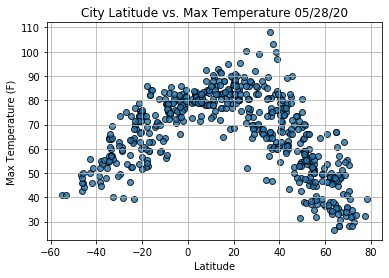

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

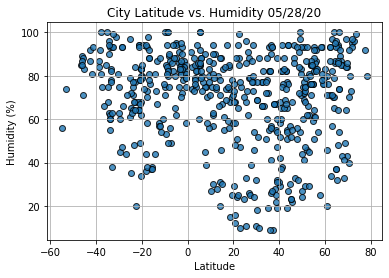

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

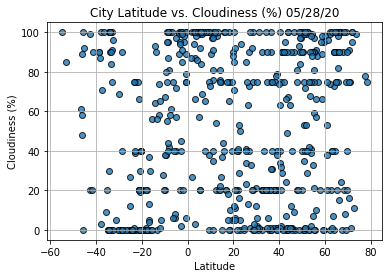

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

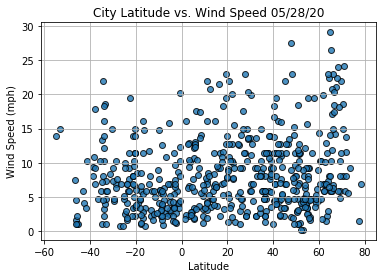

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

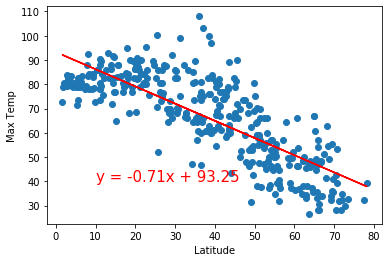

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

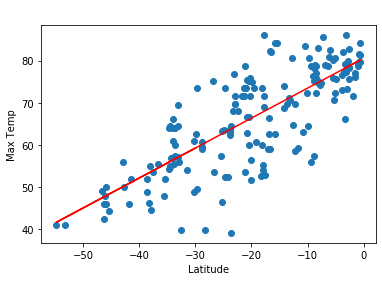

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

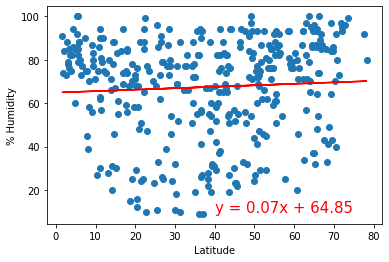

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

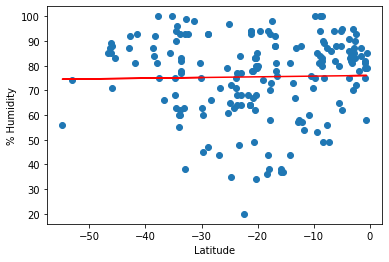

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

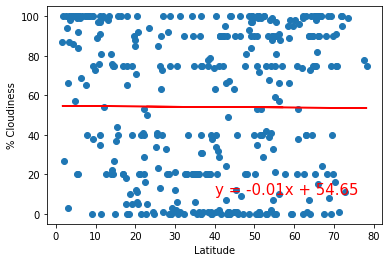

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

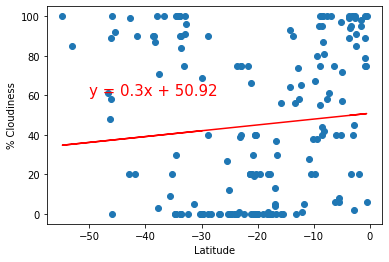

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

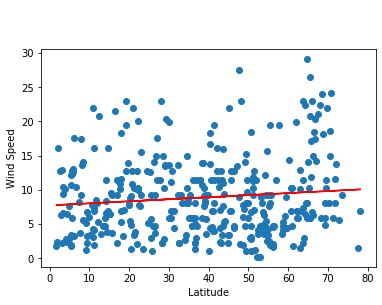

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

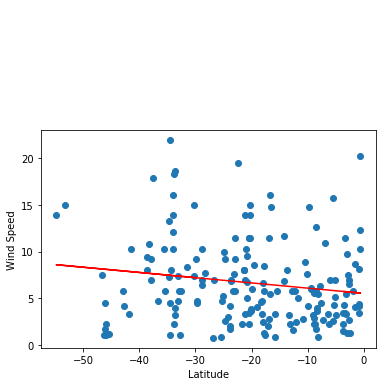

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))